In [844]:
import pandas as pd
import numpy as np
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.metrics import f1_score

In [845]:
df=pd.read_csv("mini3.csv")

In [846]:
warnings.filterwarnings('ignore')

In [847]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map
0,50,1,168,62,110,80,1,1,0,0,1,0,21.967120,90.000000
1,55,0,156,85,140,90,3,1,0,0,1,1,34.927679,106.666667
2,52,0,165,64,130,70,3,1,0,0,0,1,23.507805,90.000000
3,48,1,169,82,150,100,1,1,0,0,1,1,28.710479,116.666667
4,48,0,156,56,100,60,1,1,0,0,0,0,23.011177,73.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68591,53,1,168,76,120,80,1,1,1,0,1,0,26.927438,93.333333
68592,62,0,158,126,140,90,2,2,0,0,1,1,50.472681,106.666667
68593,52,1,183,105,180,90,3,1,0,1,0,1,31.353579,120.000000
68594,61,0,163,72,135,80,1,2,0,0,0,1,27.099251,98.333333


In [848]:
df= df[(df['bmi']>10) & (df['bmi']<100)]

In [849]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map
0,50,1,168,62,110,80,1,1,0,0,1,0,21.967120,90.000000
1,55,0,156,85,140,90,3,1,0,0,1,1,34.927679,106.666667
2,52,0,165,64,130,70,3,1,0,0,0,1,23.507805,90.000000
3,48,1,169,82,150,100,1,1,0,0,1,1,28.710479,116.666667
4,48,0,156,56,100,60,1,1,0,0,0,0,23.011177,73.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68591,53,1,168,76,120,80,1,1,1,0,1,0,26.927438,93.333333
68592,62,0,158,126,140,90,2,2,0,0,1,1,50.472681,106.666667
68593,52,1,183,105,180,90,3,1,0,1,0,1,31.353579,120.000000
68594,61,0,163,72,135,80,1,2,0,0,0,1,27.099251,98.333333


In [850]:
categorical_val = []
continous_val = []
for c in df.columns:
    print("--------------------")
    print(f"{c} : {df[c].unique()}")
    if len(df[c].unique()) <= 10:
        categorical_val.append(c)
    else:
        continous_val.append(c)
        df[c] = pd.cut(df[c], bins=5, labels=range(5))

--------------------
age : [50 55 52 48 60 61 62 54 41 40 46 58 59 63 64 57 56 49 51 44 65 45 53 47
 42 39 43 30]
--------------------
gender : [1 0]
--------------------
height : [168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182 149 142 150 144 147 146 141 195 140 198 186 145 143 196 138 194
 190 134 136 100 120 189 137 192 191 117 119 130 110 193 132 135 139 133
 207 109 125 197 105 108 111 113 131]
--------------------
weight : [ 62  85  64  82  56  67  93  95  71  68  80  60  78 112  75  52  83  69
  90  45  65  59  66  74 105  73  55  70  72  63  50 107  84  77  79  76
  58 115  97  53  57  49 110  94  92  87 103  88  99 100  61  48  54  51
  47  91 104  81  98 108  89 101  86 142  96  44  41 116 120 117 125 106
 114 113 129 124  42 123 111 102 109  46 139 150 138 131  43 134 121  40
 141 119 126 122 118 132 130 159 140 127 149 128  37 136 154 135 146  38
 145  39 133 153 156  

In [851]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map
0,2,1,3,1,1,1,1,1,0,0,1,0,0,1
1,3,0,2,2,2,1,3,1,0,0,1,1,1,2
2,3,0,3,1,1,1,3,1,0,0,0,1,0,1
3,2,1,3,1,2,2,1,1,0,0,1,1,1,2
4,2,0,2,0,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68591,3,1,3,1,1,1,1,1,1,0,1,0,0,1
68592,4,0,2,3,2,1,2,2,0,0,1,1,2,2
68593,3,1,3,2,3,1,3,1,0,1,0,1,1,2
68594,4,0,2,1,2,1,1,2,0,0,0,1,0,1


In [852]:
categorical_val.remove('cardio')
df = pd.get_dummies(df, columns = categorical_val)

In [853]:
df

,age,height,weight,ap_hi,ap_lo,cardio,bmi,map,gender_0,gender_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,2,3,1,1,1,0,0,1,False,True,...,False,True,False,False,True,False,True,False,False,True
1,3,2,2,2,1,1,1,2,True,False,...,True,True,False,False,True,False,True,False,False,True
2,3,3,1,1,1,1,0,1,True,False,...,True,True,False,False,True,False,True,False,True,False
3,2,3,1,2,2,1,1,2,False,True,...,False,True,False,False,True,False,True,False,False,True
4,2,2,0,1,0,0,0,0,True,False,...,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68591,3,3,1,1,1,0,0,1,False,True,...,False,True,False,False,False,True,True,False,False,True
68592,4,2,3,2,1,1,2,2,True,False,...,False,False,True,False,True,False,True,False,False,True
68593,3,3,2,3,1,1,1,2,False,True,...,True,True,False,False,True,False,False,True,True,False
68594,4,2,1,2,1,1,0,1,True,False,...,False,False,True,False,True,False,True,False,True,False


In [828]:
sc = StandardScaler()
col_to_scale = continous_val
df[col_to_scale] = sc.fit_transform(df[col_to_scale])

In [854]:
scaler = MinMaxScaler()
scaler.fit(df[ ['age','height','weight','ap_hi','ap_lo','bmi','map'] ])
df[ ['age','height','weight','ap_hi','ap_lo',"bmi",'map'] ] = (scaler.transform(df[ ['age','height','weight','ap_hi','ap_lo','bmi','map'] ]))

In [855]:
df

,age,height,weight,ap_hi,ap_lo,cardio,bmi,map,gender_0,gender_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0.50,0.75,0.25,0.25,0.25,0,0.00,0.25,False,True,...,False,True,False,False,True,False,True,False,False,True
1,0.75,0.50,0.50,0.50,0.25,1,0.25,0.50,True,False,...,True,True,False,False,True,False,True,False,False,True
2,0.75,0.75,0.25,0.25,0.25,1,0.00,0.25,True,False,...,True,True,False,False,True,False,True,False,True,False
3,0.50,0.75,0.25,0.50,0.50,1,0.25,0.50,False,True,...,False,True,False,False,True,False,True,False,False,True
4,0.50,0.50,0.00,0.25,0.00,0,0.00,0.00,True,False,...,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68591,0.75,0.75,0.25,0.25,0.25,0,0.00,0.25,False,True,...,False,True,False,False,False,True,True,False,False,True
68592,1.00,0.50,0.75,0.50,0.25,1,0.50,0.50,True,False,...,False,False,True,False,True,False,True,False,False,True
68593,0.75,0.75,0.50,0.75,0.25,1,0.25,0.50,False,True,...,True,True,False,False,True,False,False,True,True,False
68594,1.00,0.50,0.25,0.50,0.25,1,0.00,0.25,True,False,...,False,False,True,False,True,False,True,False,True,False


In [856]:
def replace_bool_with_numbers(x):
    if isinstance(x, bool):
        return int(x)
    return x
df = df.applymap(replace_bool_with_numbers)

In [857]:
df

,age,height,weight,ap_hi,ap_lo,cardio,bmi,map,gender_0,gender_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0.50,0.75,0.25,0.25,0.25,0,0.00,0.25,0,1,...,0,1,0,0,1,0,1,0,0,1
1,0.75,0.50,0.50,0.50,0.25,1,0.25,0.50,1,0,...,1,1,0,0,1,0,1,0,0,1
2,0.75,0.75,0.25,0.25,0.25,1,0.00,0.25,1,0,...,1,1,0,0,1,0,1,0,1,0
3,0.50,0.75,0.25,0.50,0.50,1,0.25,0.50,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0.50,0.50,0.00,0.25,0.00,0,0.00,0.00,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68591,0.75,0.75,0.25,0.25,0.25,0,0.00,0.25,0,1,...,0,1,0,0,0,1,1,0,0,1
68592,1.00,0.50,0.75,0.50,0.25,1,0.50,0.50,1,0,...,0,0,1,0,1,0,1,0,0,1
68593,0.75,0.75,0.50,0.75,0.25,1,0.25,0.50,0,1,...,1,1,0,0,1,0,0,1,1,0
68594,1.00,0.50,0.25,0.50,0.25,1,0.00,0.25,1,0,...,0,0,1,0,1,0,1,0,1,0


In [870]:
df.corr()

,age,height,weight,ap_hi,ap_lo,cardio,bmi,map,gender_0,gender_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
age,1.000000,-0.062465,0.049297,0.156257,0.090307,0.229308,0.089145,0.149026,0.025406,-0.025406,...,0.146727,-0.084082,0.024784,0.088789,0.045566,-0.045566,0.028920,-0.028920,0.010080,-0.010080
height,-0.062465,1.000000,0.204485,-0.009538,0.019237,-0.014417,-0.185999,-0.002427,-0.447828,0.447828,...,-0.046645,0.025485,-0.016589,-0.017956,-0.158527,0.158527,-0.074934,0.074934,0.014021,-0.014021
weight,0.049297,0.204485,1.000000,0.200454,0.158302,0.162612,0.601025,0.213512,-0.136339,0.136339,...,0.099780,-0.104968,0.080393,0.062047,-0.053277,0.053277,-0.056872,0.056872,0.023565,-0.023565
ap_hi,0.156257,-0.009538,0.200454,1.000000,0.493674,0.403083,0.206692,0.758610,-0.041823,0.041823,...,0.135411,-0.093723,0.075661,0.051572,-0.023703,0.023703,-0.031054,0.031054,-0.002802,0.002802
ap_lo,0.090307,0.019237,0.158302,0.493674,1.000000,0.207961,0.145847,0.564529,-0.051236,0.051236,...,0.078829,-0.058083,0.051014,0.027890,-0.017144,0.017144,-0.030811,0.030811,0.001196,-0.001196
cardio,0.229308,-0.014417,0.162612,0.403083,0.207961,1.000000,0.165094,0.382253,-0.007111,0.007111,...,0.192538,-0.091029,0.053017,0.070287,0.016317,-0.016317,0.008452,-0.008452,0.037705,-0.037705
bmi,0.089145,-0.185999,0.601025,0.206692,0.145847,0.165094,1.000000,0.214514,0.090117,-0.090117,...,0.121517,-0.117367,0.094187,0.065136,0.021295,-0.021295,-0.019886,0.019886,0.008666,-0.008666
map,0.149026,-0.002427,0.213512,0.758610,0.564529,0.382253,0.214514,1.000000,-0.053305,0.053305,...,0.138882,-0.086795,0.066290,0.051487,-0.027545,0.027545,-0.038179,0.038179,-0.005741,0.005741
gender_0,0.025406,-0.447828,-0.136339,-0.041823,-0.051236,-0.007111,0.090117,-0.053305,1.000000,-1.000000,...,0.029921,-0.019059,0.005404,0.020338,0.338942,-0.338942,0.171071,-0.171071,0.005905,-0.005905
gender_1,-0.025406,0.447828,0.136339,0.041823,0.051236,0.007111,-0.090117,0.053305,-1.000000,1.000000,...,-0.029921,0.019059,-0.005404,-0.020338,-0.338942,0.338942,-0.171071,0.171071,-0.005905,0.005905


In [865]:
target="cardio"
limit = int(len(df) * 0.60)
train = df[:limit]
test = df[limit:]
train_y = train[target]
test_y = test[target]
del train[target]
del test[target]

In [861]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(train,train_y)

In [862]:
print("Accuracy:",metrics.accuracy_score(test_y,clf.predict(test)))
print('accure_train' , metrics.accuracy_score(train_y , clf.predict(train)))
print("f1 score:",metrics.f1_score(test_y, clf.predict(test)))

Accuracy: 0.7218091697645601
accure_train 0.737250042520106
f1 score: 0.6895766399609581


In [866]:
clf = tree.DecisionTreeClassifier(max_depth=10) 
clf.fit( train, train_y )
y_pred = clf.predict( test )
correct = test_y == y_pred
test['REAL'] = test_y
test['PRED'] = y_pred
test['CORRECT'] = test['PRED'] == test['REAL']
test['TP'] = (test['PRED'] == 1) & (test['REAL'] == 1)
test['TN'] = (test['PRED'] == 0) & (test['REAL'] == 0)
test['FP'] = (test['PRED'] == 1) & (test['REAL'] == 0)
test['FN'] = (test['PRED'] == 0) & (test['REAL'] == 1)

for c in ['CORRECT','TP','TN','FP','FN']:
    test[c] = test[c].astype(int)
fn = test['FN'].mean() * 20
fp = test['FP'].mean() * 3
tp = test['TP'].mean() * 15
tn = test['TN'].mean() * 20

TP = sum(1 for true_label, predicted_label in zip(test['REAL'], test['PRED']) if true_label == predicted_label)
TI = len(test['REAL'])
test_accuracy = TP / TI
test_accuracy_percentage = test_accuracy * 100

print("Test Accuracy:", test_accuracy)
print("Test Accuracy (%):", test_accuracy_percentage)
weighted_accuracy = (tp + tn) / ( fn+fp+tp+tn )
recall=tp/(tp+fn)
Specificity=tn/(tn+fp)
Precision=tp/(tp+fp)
f1_score=2*recall*Precision/(recall+Precision)
print(weighted_accuracy)
print(f1_score)

Test Accuracy: 0.7218091697645601
Test Accuracy (%): 72.18091697645602
0.7630892028907347
0.698329853862213


In [867]:
feature_df = pd.DataFrame({
    'feature': train.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

In [868]:
feature_df

,feature,importance
3,ap_hi,0.615878
11,cholesterol_3,0.112149
0,age,0.106935
6,map,0.050562
2,weight,0.020664
5,bmi,0.015227
19,active_0,0.011537
1,height,0.009801
14,gluc_3,0.007886
9,cholesterol_1,0.005926


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

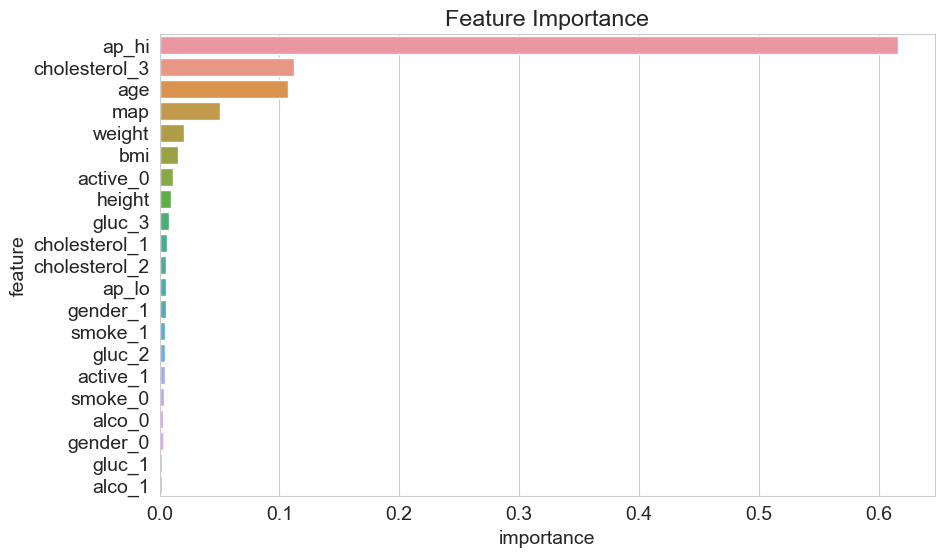

In [869]:
plt.title('Feature Importance')
sns.barplot(data = feature_df, x = 'importance', y='feature')
